In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from scint_tools import scint_utils

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})

# timezone_IST = timezone(dt.timedelta(hours=5, minutes=30))

Data loaded ..
RFI subtracted ..
Calculating S4 for freq : 263.82 MHz
Data loaded ..
RFI subtracted ..
Calculating S4 for freq : 263.82 MHz
Data loaded ..
RFI subtracted ..
Calculating S4 for freq : 263.82 MHz
Data loaded ..
RFI subtracted ..
Calculating S4 for freq : 263.82 MHz
Data loaded ..
RFI subtracted ..
Calculating S4 for freq : 263.82 MHz


Text(0.5, 0, 'Local time (IST)')

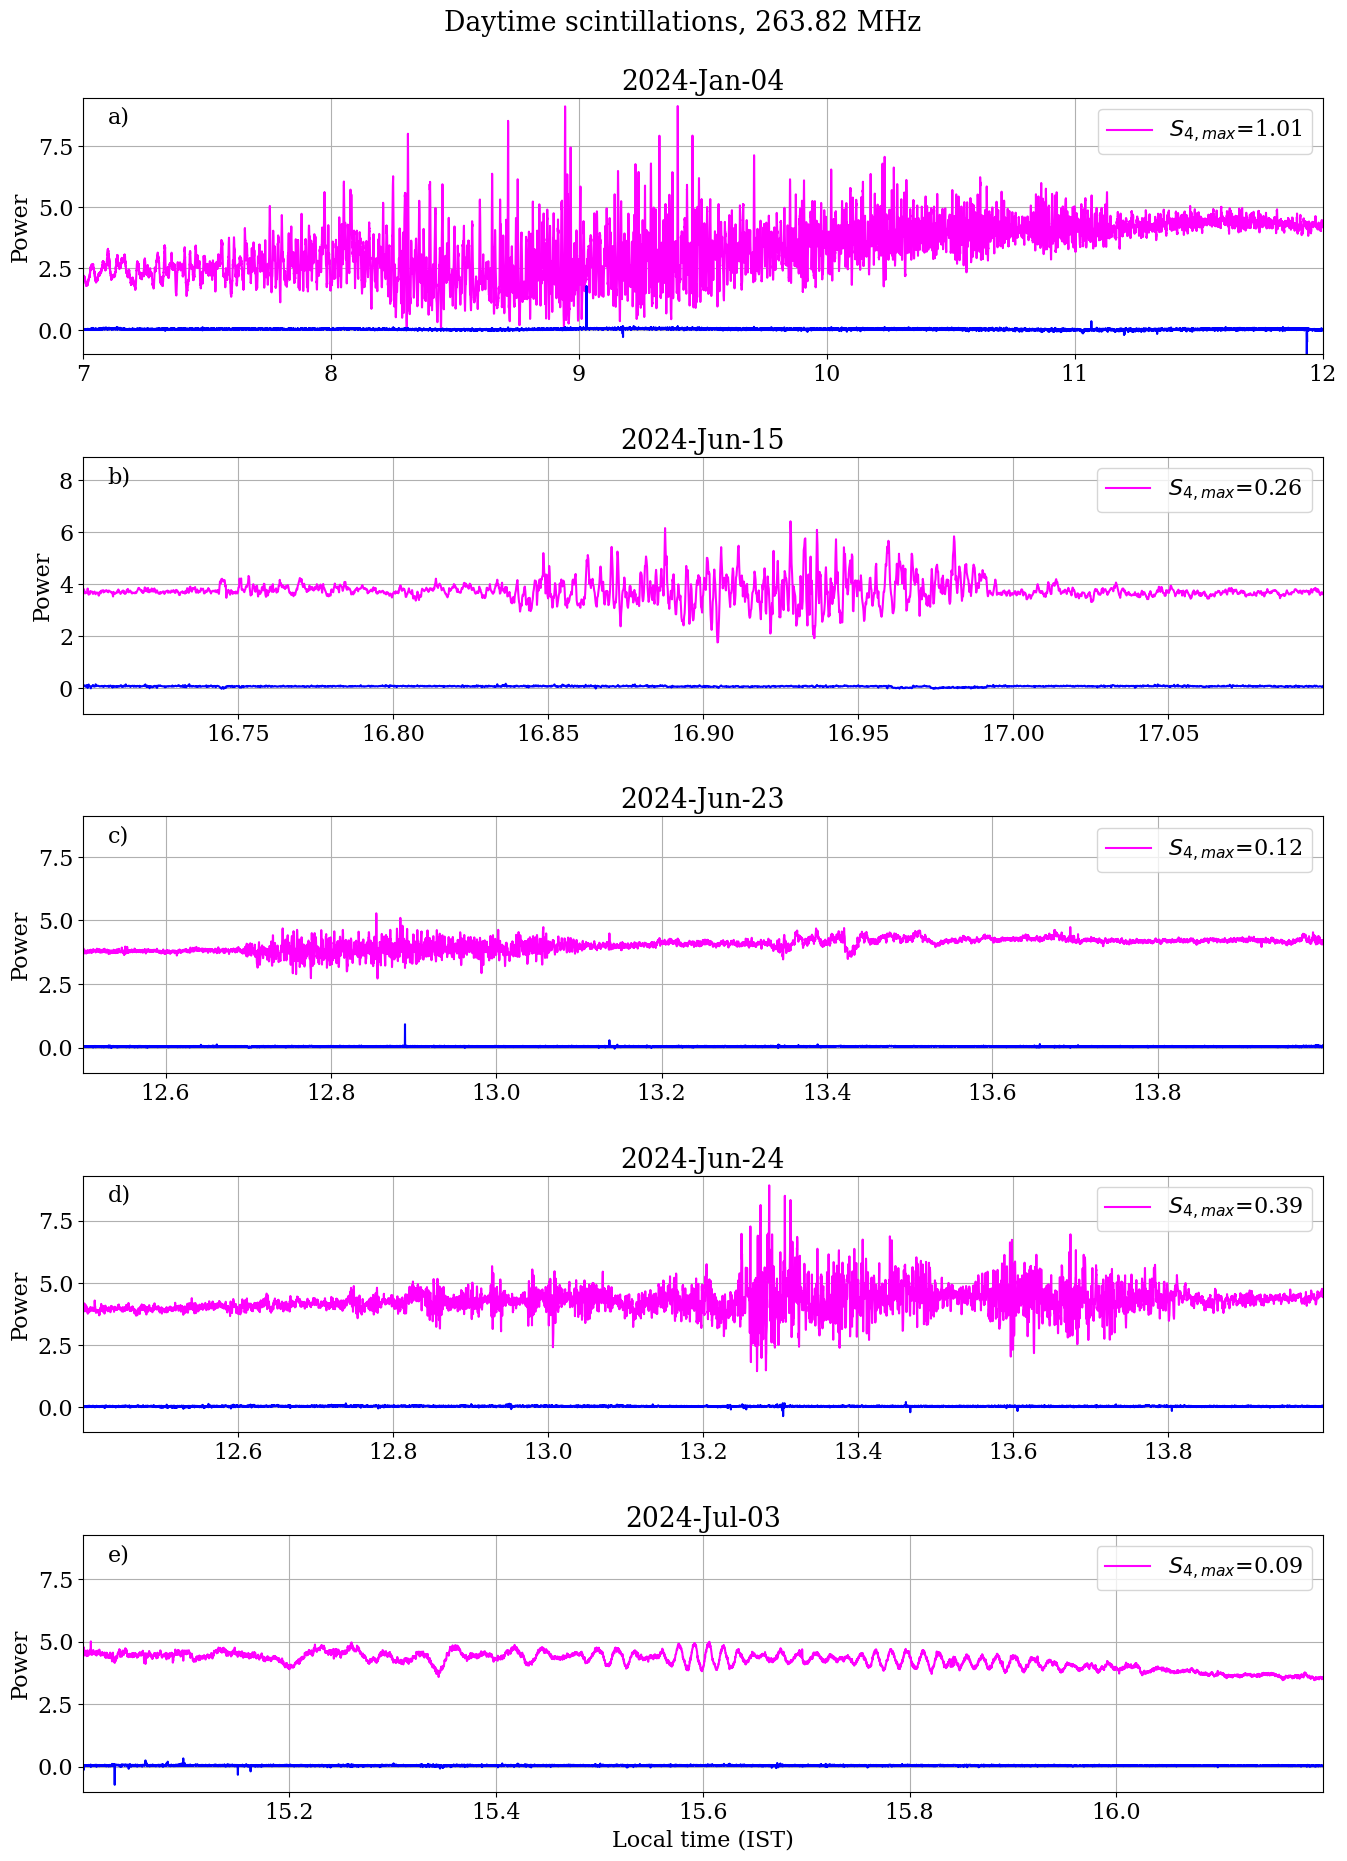

In [2]:
PATH = "/home/jishnu/PIE_DATA/"
daytime_scint_files = ["20240103-042436_combined.hdf5", "20240615-043024.hdf5", "20240623-043019.hdf5", "20240624-043025.hdf5", "20240703-043122.hdf5"]
sc_start = [31, 16.7, 12.5, 12.4, 15]
sc_end = [36, 17.1, 14, 14, 16.2]
labels = ["a)", "b)", "c)", "d)", "e)"]

fig, ax = plt.subplots(len(daytime_scint_files),1, figsize=(16,22))

for i in range(len(daytime_scint_files)):
    mydata = scint_utils.scintdata(PATH+daytime_scint_files[i])
    mydata.RFIsub()

    zoom_indices = mydata.get_indices(hr_low=sc_start[i], hr_high=sc_end[i])
    s4_values = mydata.calc_s4(zoom_indices)

    s4_max = np.max(s4_values)

    data_mean = np.mean(mydata.satdlink_proc_pow_c1)
    data_std = np.std(mydata.satdlink_proc_pow_c1)

    if i==0:
        ax[i].set_title("2024-Jan-04")
        ax[i].plot(mydata.hrs_full[zoom_indices]-24, mydata.satdlink_proc_pow_c1[zoom_indices], color='magenta', label=r"$S_{4, max}$"+"={:.2f}".format(s4_max))
        ax[i].plot(mydata.hrs_full[zoom_indices]-24, (mydata.ref_pow_1-mydata.ref_pow_2)[zoom_indices], color='blue') #label="Reference channel difference", 
        ax[i].set_xlim(min(mydata.hrs_full[zoom_indices])-24, max(mydata.hrs_full[zoom_indices])-24)
        ax[i].legend(loc='upper right')
        # ax[i].set_ylim(-1, data_mean + 3*data_std)
        ax[i].set_ylim(-1, data_mean + 6)
        ax[i].set_xticks(np.arange(min(mydata.hrs_full[zoom_indices])-24, max(mydata.hrs_full[zoom_indices])-24+1, 1.0))
        ax[i].grid()
        ax[i].set_ylabel("Power")
        ax[i].text(0.02, 0.9, labels[i], transform=ax[i].transAxes)

    else:
        ax[i].set_title(mydata.obs_date)
        ax[i].plot(mydata.hrs_full[zoom_indices], mydata.satdlink_proc_pow_c1[zoom_indices], color='magenta', label=r"$S_{4, max}$"+"={:.2f}".format(s4_max))
        ax[i].plot(mydata.hrs_full[zoom_indices], (mydata.ref_pow_1-mydata.ref_pow_2)[zoom_indices], color='blue') #label="Reference channel difference", 
        ax[i].set_xlim(min(mydata.hrs_full[zoom_indices]), max(mydata.hrs_full[zoom_indices]))
        ax[i].legend(loc='upper right')
        # ax[i].set_ylim(-1, data_mean + 3*data_std)
        ax[i].set_ylim(-1, data_mean + 6)
        # ax[i].set_xticks(np.linspace(min(mydata.hrs_full[zoom_indices]), max(mydata.hrs_full[zoom_indices]), ))
        ax[i].grid()
        ax[i].set_ylabel("Power")
        ax[i].text(0.02, 0.9, labels[i], transform=ax[i].transAxes)

fig.suptitle("Daytime scintillations, {:.2f} MHz".format(mydata.freq_1), y=0.92)
fig.subplots_adjust(hspace=0.4)
ax[-1].set_xlabel("Local time (IST)")
# fig.savefig("Daytime_scintillations_collage.pdf", dpi=300, bbox_inches='tight')